# AIM : see how the combustion properties change at different $P$ and $T$ for a reaction $O_2 + H_2 $

In [1]:
# importing libraries
import os  
import numpy             as np 
import seaborn           as sbn 
import matplotlib.pyplot as plt


### COMB() class:
####  get_data()
####  problem_generator()

In [2]:
# determining a class where storing the data 
class COMB:
    '''
    COMBUSTION results
    '''
    def __init__(self):
        self.P    = 0.0
        self.T    = 0.0
        self.of   = 0.0
        self.m    = 0.0
        self.cp   = 0.0
        self.H    = 0.0
        self.H2   = 0.0
        self.O    = 0.0
        self.O2   = 0.0
        self.O3   = 0.0
        self.OH   = 0.0
        self.H2O  = 0.0
        self.H2OL = 0.0
    
    def get_data(self,target):
        '''
        Reading data from the result of the NASA_CEA simulation
        '''
        with open(target, 'r') as file: 
            file.readlines(1)
            DATA = file.readlines(1)
            data = np.empty(0)
            # read only the 2nd line 
            for line in DATA:
                # reading each word in the line 
                for value in line.split():
                    data = np.concatenate((data, value), axis=None)
            
        # allocating data
        self.of   = float(data[0])
        self.P    = float(data[1])
        self.T    = float(data[2])
        self.m    = float(data[3])
        self.cp   = float(data[4]) 
        self.H    = float(data[5])
        self.H2   = float(data[6])
        self.O    = float(data[7])
        self.O2   = float(data[8])
        self.O3   = float(data[9])
        self.OH   = float(data[10])
        self.H2O  = float(data[11])
        self.H2OL = float(data[12])
   
    def problem_generation(self,T,P,FUEL,OX,target):
        '''
        This subroutine generates the ***.inp file to be analyzed by NASA_CEA
        The problem is a combustion problem. It's given in input:
            T      -- temperatue of each reactant
            P      -- pressure of the combustion chamber
            FUEL   -- total weight of fuel
            OX     -- total weight of oxidant
            target -- file name
        '''

        with open(target, 'w') as file: 
            file.write('problem   case=case_01 \n')
            # problem description
            text = '    hp   p,bar=' + str(P) + '\n'# + ',  t,k=' + str(T) + '\n'
            file.write(text)
            
            file.write('react \n')
            # fuel description
            text = '    fuel=H2 wt=' + str(FUEL) + ',  t,k=' + str(T) + '\n'
            file.write(text)
            # oxidazer description
            text = '    oxid=O2 wt=' + str(OX) +   ',  t,k=' + str(T) + '\n'  
            file.write(text)  
            
            file.write('output  transport short trace= 1e-10\n')
            file.write('    plot o/f p t m cp H H2 O O2 O3 OH H2O H2O(L)\n')
            file.write('end \n')  

# functions
### print_list()
### setup_problem()

In [3]:
def print_list(CC):
    '''
    This function gets the data from the COMB() list and stores
    into the arrays:
        t    -- temperature array
        p    -- pressure array
        of   -- O/F array
        m    -- molar mass array
        cp   -- CP array
        H    -- H molar/mass fraction array
        H2   -- H2 molar/mass fraction array
        O    -- O molar/mass fraction array
        O2   -- O2 molar/mass fraction array
        O3   -- O3 molar/mass fraction array
        OH   -- OH molar/mass fraction array
        H2O  -- H2O(gas) molar/mass fraction array
        H2OL -- H2O(liquid) molar/mass fraction array
    '''
    # getting data from object list
    t    = np.zeros(len(CC))
    of   = np.zeros(len(CC))
    p    = np.zeros(len(CC))
    m    = np.zeros(len(CC))
    cp   = np.zeros(len(CC))
    H    = np.zeros(len(CC))
    H2   = np.zeros(len(CC))
    O    = np.zeros(len(CC))
    O2   = np.zeros(len(CC))
    O3   = np.zeros(len(CC))
    OH   = np.zeros(len(CC))
    H2O  = np.zeros(len(CC))
    H2OL = np.zeros(len(CC))

    for ii in range(0,len(CC)):
        # getting system status values
        # getting temperature
        t[ii]    = CC[ii].T
        # getting of
        of[ii]   = CC[ii].of
        # getting pressure
        p[ii]    = CC[ii].P
        # getting average molecular mass
        m[ii]    = CC[ii].m
        # getting cp
        cp[ii]   = CC[ii].cp
        # getting molar/mass fraction of mixture's species
        # getting H 
        H[ii]    = CC[ii].H
        # getting H2
        H2[ii]   = CC[ii].H2
        # getting O
        O[ii]    = CC[ii].O
        # getting O2 
        O2[ii]   = CC[ii].O2
        # getting O3
        O3[ii]   = CC[ii].O3
        # getting OH
        OH[ii]   = CC[ii].OH
        # getting H2O 
        H2O[ii]  = CC[ii].H2O
        # getting H2OL 
        H2OL[ii] = CC[ii].H2OL

    return t, p, of, m, cp, H, H2, O, O2, O3, OH, H2O, H2OL 

def setup_problem(P_vec,T_vec,H2_vec,O2_vec):
    '''
    This subroutine computes the different cases for the H2+O2 combustion given:
        P_vec  -- chamber pressure array
        T_vec  -- reactants initial temperature array
        H2_vec -- H2 initial weight array
        O2_vec -- O2 initial weight array
    '''

    # check on input data
    if(len(P_vec)!=len(T_vec) & len(P_vec)!=len(H2_vec) & len(P_vec)!=len(O2_vec)):
        print('The lenght of the input data vectors are not equal: error')

    # initializing combustion's result list
    CC = np.array([COMB() for ii in range(0,len(P_vec))])
    
    # analyzing all cases
    for ii,pressure in enumerate(P_vec):
        temperature = T_vec[ii]
        h2          = H2_vec[ii]
        o2          = O2_vec[ii]
        CC[ii].problem_generation(temperature,pressure,h2,o2,'case_01.inp') 
        os.system('bash ./CEA_case')
        CC[ii].get_data('case_01.plt')

    # getting data from object list
    t, p, of, m, cp, H, H2, O, O2, O3, OH, H2O, H2OL = print_list(CC)

    return t, p, of, m, cp, H, H2, O, O2, O3, OH, H2O, H2OL 

# Study of properties' variation wtr $ T $

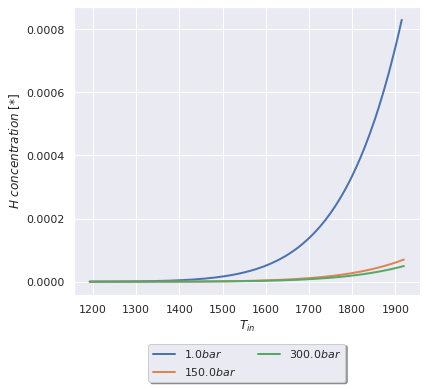

In [4]:
# setting up the interval of study
# reactants
O2_vec = np.linspace(0.025,0.975,200)
H2_vec = 1 - O2_vec
# initial conditions
T  = np.linspace(200,1000,200)
P  = np.linspace(1,100,200)

# generation of object list 
CC_P = np.array([COMB() for ii in range(0,len(T))])

# creating the figure 
sbn.set_theme()
fig1 = plt.figure()
ax1  = fig1.add_axes([0,0,1,1])

# setting concentrations
h2 = 1
o2 = 1

P1 = np.linspace(1,300,3)

for pressure in P1:
    for ii,temperature in enumerate(T):
        CC_P[ii].problem_generation(temperature,pressure,h2,o2,'case_01.inp') 
        os.system('bash ./CEA_case')
        CC_P[ii].get_data('case_01.plt')

        # getting data from object list
        t, p, of, m, cp, H, H2, O, O2, O3, OH, H2O, H2OL = print_list(CC_P)

    # plotting data
    ax1.plot(t,H,label=r'$' + str(round(pressure,0)) + 'bar$',linewidth=2)

chartBox = ax1.get_position()
ax1.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel(r'$T_{in}$')
plt.ylabel(r'$H \ concentration \ [*]$')
plt.show()


# Study of properties'variation wtr $P$

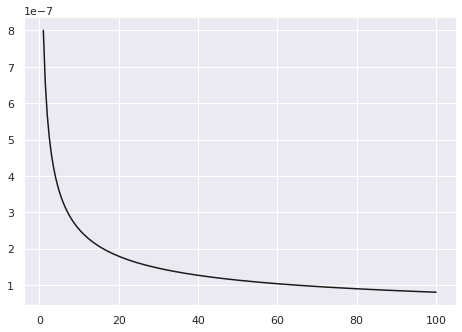

In [5]:
# setting up the interval of study
# reactants
O2_vec = np.linspace(0.025,0.975,200)
H2_vec = 1 - O2_vec
# initial conditions
T  = np.linspace(200,1000,200)
P  = np.linspace(1,100,200)

# generation of object list 
CC_P = np.array([COMB() for ii in range(0,len(P))])

for ii,pressure in enumerate(P):
    temperature = 300
    CC_P[ii].problem_generation(temperature,pressure,1,1,'case_01.inp') 
    os.system('bash ./CEA_case')
    CC_P[ii].get_data('case_01.plt')

# getting data from object list
t, p, of, m, cp, H, H2, O, O2, O3, OH, H2O, H2OL = print_list(CC_P)

# plotting data
sbn.set_theme()
fig2 = plt.figure()
ax2   = fig2.add_axes([0,0,1,1])
ax2.plot(p,H,'k')
plt.show()



# Study of properties' variation wtr $[H_2]$ and $[O_2]$

<ipython-input-18-f53eb1015230>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


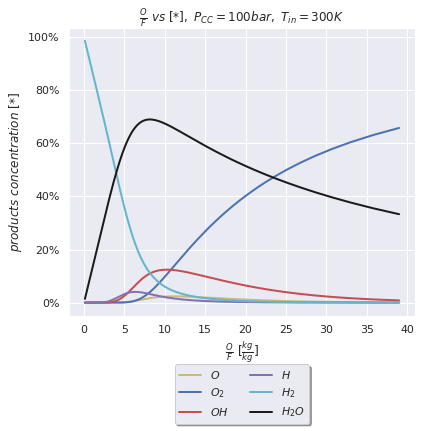

In [18]:
# setting up the interval of study
# reactants
O2_vec = np.linspace(0.1,0.975,400)
H2_vec = 1 - O2_vec
# initial conditions
T  = np.linspace(200,1000,400)
P  = np.linspace(1,100,400)

# generation of object list 
CC_C = np.array([COMB() for ii in range(0,len(H2_vec))])

for ii,h2 in enumerate(H2_vec):
    temperature = 300
    pressure    = 100
    o2          = O2_vec[ii]
    CC_C[ii].problem_generation(temperature,pressure,h2,o2,'case_01.inp') 
    os.system('bash ./CEA_case')
    CC_C[ii].get_data('case_01.plt')

# getting data from object list
t, p, of, m, cp, H, H2, O, O2, O3, OH, H2O, H2OL = print_list(CC_C)

# plotting data
sbn.set_theme()
fig3 = plt.figure()
ax3  = fig3.add_axes([0,0,1,1])
ax3.plot(of,O,'y',  label=r'$O$', linewidth=2)
ax3.plot(of,O2,'b', label=r'$O_2$', linewidth=2)
ax3.plot(of,OH,'r', label=r'$OH$', linewidth=2)
ax3.plot(of,H,'m',  label=r'$H$', linewidth=2)
ax3.plot(of,H2,'c', label=r'$H_2$', linewidth=2)
ax3.plot(of,H2O,'k',label=r'$H_2O$', linewidth=2)
chartBox = ax3.get_position()
ax3.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.title(r'$\frac{O}{F} \ vs \  [*], \  P_{CC} = ' + str(pressure) + 'bar, \ T_{in} = ' + str(temperature) +  'K$')
plt.xlabel(r'$\frac{O}{F} \ [ \frac{kg}{kg} ] $')
plt.ylabel(r'$products \ concentration \ [*]$')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.show()